CHRISTIAN DENOMINATIONS BASED UPON STATE: MIDWEST by Ana Martinez

In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
import geopandas
from IPython.display import display
warnings.simplefilter(action='ignore', category=FutureWarning)

%config InlineBackend.figure_format ='retina'

In [2]:
df=pd.read_csv('Longitudinal Religious Congregations and Membership File, 1980-2010 (State Level).csv',delimiter=',',skipfooter=14,engine='python')

In [3]:
df.head(3)

,STFIP,STATEAB,YEAR,TOTPOP,GRPCODE,GRPNAME,ADHERENT,CONGREG,RELTRAD,FAMILY,NOTE_MIS,NOTE_COM,NOTE_MEA
0,2,AK,1980,406681,293b,"Moravian Church in America, Alaska and North P...",4372.0,4372.0,2,92.0,0,2,0
1,2,AK,1980,406681,244,Fellowship of Grace Brethren Churches,174.0,2.0,2,95.0,0,0,0
2,2,AK,1980,406681,293,Moravian Church in America (Unitas Fratrum) No...,4372.0,21.0,2,92.0,0,1,0


In [4]:
#Midwest Region: Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, Wisconsin
#IL, IN, IA, KS, MI, MN, MO, NE, ND, OH, SD, WI

In [5]:
#1980 top 5 Christian churches: Catholic, Mainline Protestant, 
#1990 top 5 Christian churches:
#2000 top 5 Christian churches:
#2010 top 5 Christian churches:

In [6]:
#Midwest region states
df_MW = df.loc[df['STATEAB'].isin(['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'SD', 'WI'])]
df_MW.head(2)

,STFIP,STATEAB,YEAR,TOTPOP,GRPCODE,GRPNAME,ADHERENT,CONGREG,RELTRAD,FAMILY,NOTE_MIS,NOTE_COM,NOTE_MEA
4242,19,IA,1980,2913808,363,Primitive Methodist Church USA,113.0,2.0,1,92.0,2,0,0
4243,19,IA,1980,2913808,185,Cumberland Presbyterian Church,189.0,1.0,1,91.0,0,0,0


In [7]:
#map of my region (midwest)
usa =  geopandas.read_file('../data/s_22mr22.shp')
usa.head(3)

,STATE,NAME,FIPS,LON,LAT,geometry
0,AK,Alaska,02,-152.24098,64.24019,"MULTIPOLYGON (((-179.10754 51.30120, -179.1054..."
1,AL,Alabama,01,-86.82676,32.79354,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ..."
2,AR,Arkansas,05,-92.43920,34.89977,"POLYGON ((-91.62986 36.49921, -91.62849 36.499..."


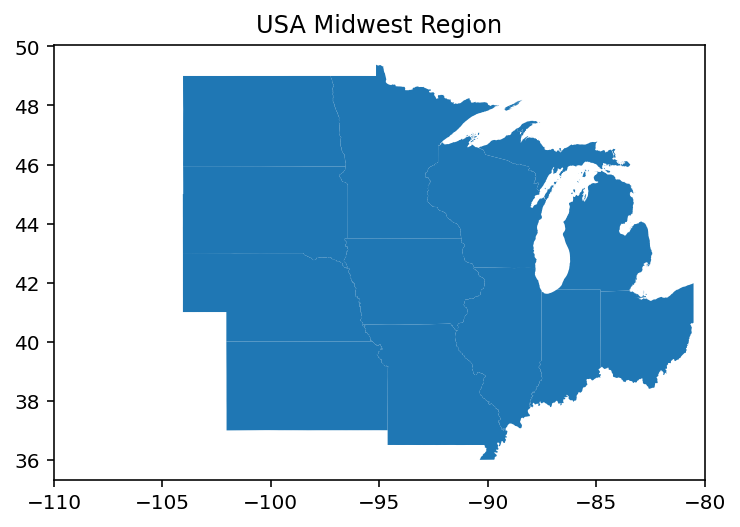

In [8]:
#map of my region (midwest)
midwest_map = usa[usa['STATE'].isin(['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'SD', 'WI'])]
midwest_plot = midwest_map.plot()
midwest_plot.set_xlim(-110,-80)
midwest_plot.set_title('USA Midwest Region')
plt.show()

In [9]:
#Illionois: IL
df_IL = df[df.STATEAB == 'IL']
display(df_IL.head(2))
display(df_IL.tail(2))

,STFIP,STATEAB,YEAR,TOTPOP,GRPCODE,GRPNAME,ADHERENT,CONGREG,RELTRAD,FAMILY,NOTE_MIS,NOTE_COM,NOTE_MEA
4934,17,IL,1980,11426518,395,Romanian Orthodox Archdiocese in the Americas,2957.0,1.0,5,89.0,0,0,1
4935,17,IL,1980,11426518,57,Baptist General Conference ('Converge Worldwide'),16404.0,70.0,1,96.0,0,0,0


,STFIP,STATEAB,YEAR,TOTPOP,GRPCODE,GRPNAME,ADHERENT,CONGREG,RELTRAD,FAMILY,NOTE_MIS,NOTE_COM,NOTE_MEA
5460,17,IL,2010,12830632,52,Korean Presbyterian Church in America (now nam...,0.0,12.0,1,91.0,0,0,0
5461,17,IL,2010,12830632,339,Pentecostal Church of God,2068.0,19.0,1,94.0,4,0,0


In [10]:
#merge
usa_df_MW = df_MW.merge(midwest_map,left_on='STATEAB', right_on='STATE')


		Top 5 Churches in IL 2010


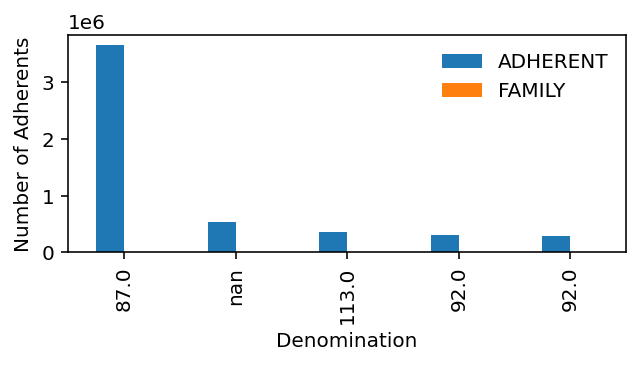

In [11]:
#Illionois bar graph
def top5_bar(year,STATEAB):
    df_MW_year = usa_df_MW[usa_df_MW.YEAR == year]
    State_year = df_MW_year[df_MW_year.STATEAB == STATEAB]
    State_year_t5 = State_year.nlargest(5, 'ADHERENT')
    bar = State_year_t5[['ADHERENT','FAMILY']].plot(kind='bar', figsize=(5,2))
    bar.set_xticklabels(State_year_t5['FAMILY'])
    bar.legend(loc='upper right', frameon=False)
    plt.xlabel("Denomination")
    plt.ylabel("Number of Adherents")
    print("\n\t\tTop 5 Churches in", STATEAB, year)
    plt.show()
    
top5_bar(2010,'IL')

In [12]:
#Indiana: IN
df_IN = df[df.STATEAB == 'IN']
display(df_IN.head(2))
display(df_IN.tail(2))

,STFIP,STATEAB,YEAR,TOTPOP,GRPCODE,GRPNAME,ADHERENT,CONGREG,RELTRAD,FAMILY,NOTE_MIS,NOTE_COM,NOTE_MEA
5462,18,IN,1980,5490224,274,The Latvian Evangelical Lutheran Church in Ame...,581.0,2.0,2,90.0,0,0,0
5463,18,IN,1980,5490224,449,"The United Methodist Church, old count",386029.0,1426.0,2,92.0,0,0,0


,STFIP,STATEAB,YEAR,TOTPOP,GRPCODE,GRPNAME,ADHERENT,CONGREG,RELTRAD,FAMILY,NOTE_MIS,NOTE_COM,NOTE_MEA
5936,18,IN,2010,6483802,175,National Association Of Congregational Christ...,926.0,9.0,2,91.0,0,0,0
5937,18,IN,2010,6483802,207b,Evangelical Lutheran Church in America Groups ...,63701.0,191.0,2,90.0,0,2,0



		Top 5 Churches in IN 2010


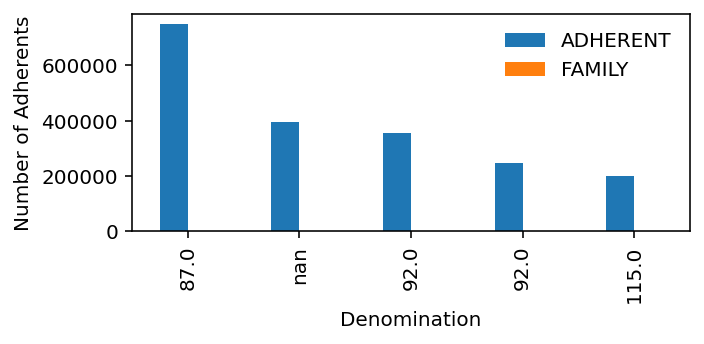

In [13]:
#Indiana bar graph
def top5_bar(year,STATEAB):
    df_MW_year = usa_df_MW[usa_df_MW.YEAR == year]
    State_year = df_MW_year[df_MW_year.STATEAB == STATEAB]
    State_year_t5 = State_year.nlargest(5, 'ADHERENT')
    bar = State_year_t5[['ADHERENT','FAMILY']].plot(kind='bar', figsize=(5,2))
    bar.set_xticklabels(State_year_t5['FAMILY'])
    bar.legend(loc='upper right', frameon=False)
    plt.xlabel("Denomination")
    plt.ylabel("Number of Adherents")
    print("\n\t\tTop 5 Churches in", STATEAB, year)
    plt.show()
    
top5_bar(2010,'IN')

In [14]:
#Iowa: IA
df_IA = df[df.STATEAB == 'IA']
df_IA = df_IA.fillna("No Information Provided")
df_IA.head(2)

,STFIP,STATEAB,YEAR,TOTPOP,GRPCODE,GRPNAME,ADHERENT,CONGREG,RELTRAD,FAMILY,NOTE_MIS,NOTE_COM,NOTE_MEA
4242,19,IA,1980,2913808,363,Primitive Methodist Church USA,113.0,2.0,1,92.0,2,0,0
4243,19,IA,1980,2913808,185,Cumberland Presbyterian Church,189.0,1.0,1,91.0,0,0,0



		Top 5 Churches in IA 2010


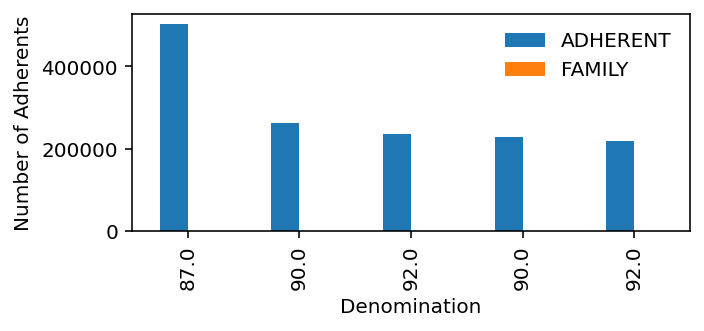

In [15]:
#Iowa bar graph
def top5_bar(year,STATEAB):
    df_MW_year = usa_df_MW[usa_df_MW.YEAR == year]
    State_year = df_MW_year[df_MW_year.STATEAB == STATEAB]
    State_year_t5 = State_year.nlargest(5, 'ADHERENT')
    bar = State_year_t5[['ADHERENT','FAMILY']].plot(kind='bar', figsize=(5,2))
    bar.set_xticklabels(State_year_t5['FAMILY'])
    bar.legend(loc='upper right', frameon=False)
    plt.xlabel("Denomination")
    plt.ylabel("Number of Adherents")
    print("\n\t\tTop 5 Churches in", STATEAB, year)
    plt.show()
    
top5_bar(2010,'IA')

In [16]:
#Kansas: KS
df_KS = df[df.STATEAB == 'KS']
display(df_KS.head(2))
display(df_KS.tail(2))

,STFIP,STATEAB,YEAR,TOTPOP,GRPCODE,GRPNAME,ADHERENT,CONGREG,RELTRAD,FAMILY,NOTE_MIS,NOTE_COM,NOTE_MEA
5938,20,KS,1980,2363679,290,"Metropolitan Community Churches, Universal Fel...",310.0,1.0,2,113.0,4,0,0
5939,20,KS,1980,2363679,19,American Baptist Churches in the USA,72789.0,255.0,2,96.0,0,0,0


,STFIP,STATEAB,YEAR,TOTPOP,GRPCODE,GRPNAME,ADHERENT,CONGREG,RELTRAD,FAMILY,NOTE_MIS,NOTE_COM,NOTE_MEA
6329,20,KS,2010,2853118,151,The Church of Jesus Christ of Latter-day Saints,34190.0,74.0,4,100.0,0,0,2
6330,20,KS,2010,2853118,449,"The United Methodist Church, old count",187804.0,690.0,2,92.0,0,0,0



		Top 5 Churches in KS 2010


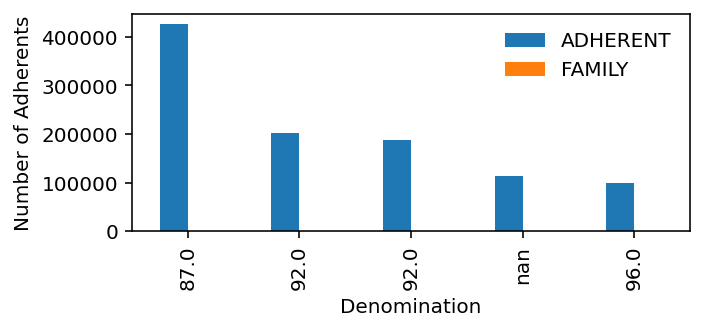

In [17]:
#Kansas bar graph
def top5_bar(year,STATEAB):
    df_MW_year = usa_df_MW[usa_df_MW.YEAR == year]
    State_year = df_MW_year[df_MW_year.STATEAB == STATEAB]
    State_year_t5 = State_year.nlargest(5, 'ADHERENT')
    bar = State_year_t5[['ADHERENT','FAMILY']].plot(kind='bar', figsize=(5,2))
    bar.set_xticklabels(State_year_t5['FAMILY'])
    bar.legend(loc='upper right', frameon=False)
    plt.xlabel("Denomination")
    plt.ylabel("Number of Adherents")
    print("\n\t\tTop 5 Churches in", STATEAB, year)
    plt.show()
    
top5_bar(2010,'KS')

In [18]:
#Michigan: MI
df_MI = df[df.STATEAB == 'MI']
display(df_MI.head(2))
display(df_MI.tail(2))

,STFIP,STATEAB,YEAR,TOTPOP,GRPCODE,GRPNAME,ADHERENT,CONGREG,RELTRAD,FAMILY,NOTE_MIS,NOTE_COM,NOTE_MEA
8033,26,MI,1980,9262078,123,"Church of God (Anderson, Indiana)",37149.0,127.0,1,93.0,0,0,0
8034,26,MI,1980,9262078,431,Ukrainian Orthodox Church of the USA,415.0,2.0,5,89.0,0,0,1


,STFIP,STATEAB,YEAR,TOTPOP,GRPCODE,GRPNAME,ADHERENT,CONGREG,RELTRAD,FAMILY,NOTE_MIS,NOTE_COM,NOTE_MEA
8546,26,MI,2010,9883640,272,Jehovah's Witnesses,0.0,216.0,4,98.0,0,0,0
8547,26,MI,2010,9883640,270,Conservative Judaism,8297.0,8.0,4,106.0,0,0,1



		Top 5 Churches in MI 2010


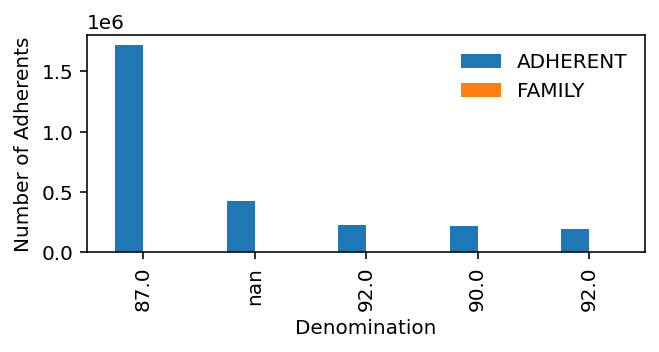

In [19]:
#Michigan bar graph
def top5_bar(year,STATEAB):
    df_MW_year = usa_df_MW[usa_df_MW.YEAR == year]
    State_year = df_MW_year[df_MW_year.STATEAB == STATEAB]
    State_year_t5 = State_year.nlargest(5, 'ADHERENT')
    bar = State_year_t5[['ADHERENT','FAMILY']].plot(kind='bar', figsize=(5,2))
    bar.set_xticklabels(State_year_t5['FAMILY'])
    bar.legend(loc='upper right', frameon=False)
    plt.xlabel("Denomination")
    plt.ylabel("Number of Adherents")
    print("\n\t\tTop 5 Churches in", STATEAB, year)
    plt.show()
    
top5_bar(2010,'MI')

In [20]:
#Minnesota: MN
df_MN = df[df.STATEAB == 'MN']
display(df_MN.head(2))
display(df_MN.tail(2))

,STFIP,STATEAB,YEAR,TOTPOP,GRPCODE,GRPNAME,ADHERENT,CONGREG,RELTRAD,FAMILY,NOTE_MIS,NOTE_COM,NOTE_MEA
8548,27,MN,1980,4075970,167,Churches of Christ,1861.0,32.0,1,115.0,0,0,0
8549,27,MN,1980,4075970,89,The Christian and Missionary Alliance,8137.0,57.0,1,93.0,0,0,0


,STFIP,STATEAB,YEAR,TOTPOP,GRPCODE,GRPNAME,ADHERENT,CONGREG,RELTRAD,FAMILY,NOTE_MIS,NOTE_COM,NOTE_MEA
8949,27,MN,2010,5303925,431,Ukrainian Orthodox Church of the USA,750.0,2.0,5,89.0,0,0,1
8950,27,MN,2010,5303925,275,Reconstructionist Judaism,389.0,1.0,4,106.0,0,0,1



		Top 5 Churches in MN 2010


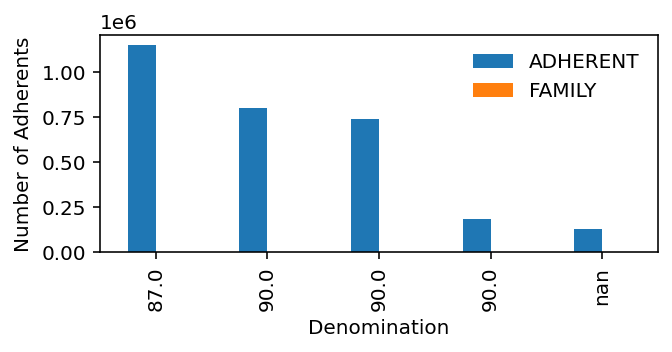

In [21]:
#Minnesota bar graph
def top5_bar(year,STATEAB):
    df_MW_year = usa_df_MW[usa_df_MW.YEAR == year]
    State_year = df_MW_year[df_MW_year.STATEAB == STATEAB]
    State_year_t5 = State_year.nlargest(5, 'ADHERENT')
    bar = State_year_t5[['ADHERENT','FAMILY']].plot(kind='bar', figsize=(5,2))
    bar.set_xticklabels(State_year_t5['FAMILY'])
    bar.legend(loc='upper right', frameon=False)
    plt.xlabel("Denomination")
    plt.ylabel("Number of Adherents")
    print("\n\t\tTop 5 Churches in", STATEAB, year)
    plt.show()
    
top5_bar(2010,'MN')

In [22]:
#Missouri: MO
df_MO = df[df.STATEAB == 'MO']
display(df_MO.head(2))
display(df_MO.tail(2))

,STFIP,STATEAB,YEAR,TOTPOP,GRPCODE,GRPNAME,ADHERENT,CONGREG,RELTRAD,FAMILY,NOTE_MIS,NOTE_COM,NOTE_MEA
8951,29,MO,1980,4916686,217,The Fire Baptized Holiness Church (Wesleyan),298.0,14.0,6,93.0,0,0,0
8952,29,MO,1980,4916686,101,Christian Methodist Episcopal Church,7482.0,13.0,6,92.0,0,0,0


,STFIP,STATEAB,YEAR,TOTPOP,GRPCODE,GRPNAME,ADHERENT,CONGREG,RELTRAD,FAMILY,NOTE_MIS,NOTE_COM,NOTE_MEA
9376,29,MO,2010,5988927,290,"Metropolitan Community Churches, Universal Fel...",697.0,3.0,2,113.0,4,0,0
9377,29,MO,2010,5988927,110,"Church of Christ (Holiness), USA",0.0,6.0,1,93.0,0,0,0



		Top 5 Churches in MO 2010


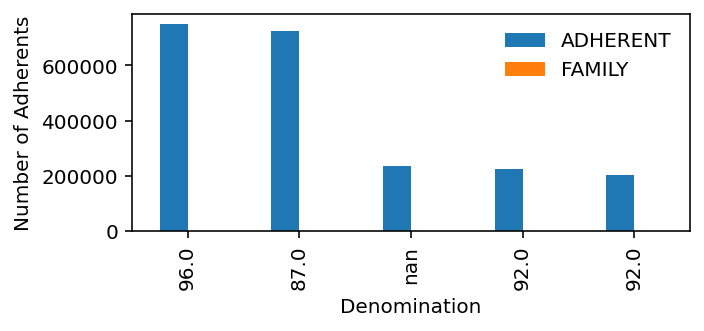

In [23]:
#Missouri bar graph
def top5_bar(year,STATEAB):
    df_MW_year = usa_df_MW[usa_df_MW.YEAR == year]
    State_year = df_MW_year[df_MW_year.STATEAB == STATEAB]
    State_year_t5 = State_year.nlargest(5, 'ADHERENT')
    bar = State_year_t5[['ADHERENT','FAMILY']].plot(kind='bar', figsize=(5,2))
    bar.set_xticklabels(State_year_t5['FAMILY'])
    bar.legend(loc='upper right', frameon=False)
    plt.xlabel("Denomination")
    plt.ylabel("Number of Adherents")
    print("\n\t\tTop 5 Churches in", STATEAB, year)
    plt.show()
    
top5_bar(2010,'MO')

In [24]:
#Nebraska: NE
df_NE = df[df.STATEAB == 'NE']
display(df_NE.head(2))
display(df_NE.tail(2))

,STFIP,STATEAB,YEAR,TOTPOP,GRPCODE,GRPNAME,ADHERENT,CONGREG,RELTRAD,FAMILY,NOTE_MIS,NOTE_COM,NOTE_MEA
10600,31,NE,1980,1569825,353,Christian Brethren,275.0,5.0,1,97.0,0,0,0
10601,31,NE,1980,1569825,127,"Church of God (Cleveland, TN)",1128.0,20.0,1,94.0,0,0,0


,STFIP,STATEAB,YEAR,TOTPOP,GRPCODE,GRPNAME,ADHERENT,CONGREG,RELTRAD,FAMILY,NOTE_MIS,NOTE_COM,NOTE_MEA
10932,31,NE,2010,1826341,111,Church of Christ Scientist,0.0,8.0,4,102.0,0,0,0
10933,31,NE,2010,1826341,373,Reformed Church in the United States,509.0,3.0,1,91.0,4,0,0



		Top 5 Churches in NE 2010


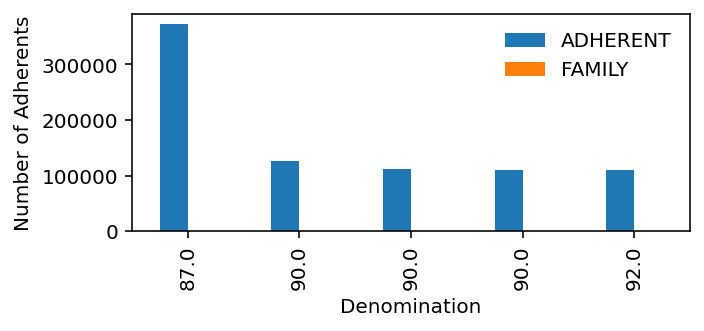

In [25]:
#Nebraska bar graph
def top5_bar(year,STATEAB):
    df_MW_year = usa_df_MW[usa_df_MW.YEAR == year]
    State_year = df_MW_year[df_MW_year.STATEAB == STATEAB]
    State_year_t5 = State_year.nlargest(5, 'ADHERENT')
    bar = State_year_t5[['ADHERENT','FAMILY']].plot(kind='bar', figsize=(5,2))
    bar.set_xticklabels(State_year_t5['FAMILY'])
    bar.legend(loc='upper right', frameon=False)
    plt.xlabel("Denomination")
    plt.ylabel("Number of Adherents")
    print("\n\t\tTop 5 Churches in", STATEAB, year)
    plt.show()
    
top5_bar(2010,'NE')

In [26]:
#North Dakota: ND
df_ND = df[df.STATEAB == 'ND']
display(df_ND.head(2))
display(df_ND.tail(2))

,STFIP,STATEAB,YEAR,TOTPOP,GRPCODE,GRPNAME,ADHERENT,CONGREG,RELTRAD,FAMILY,NOTE_MIS,NOTE_COM,NOTE_MEA
10337,38,ND,1980,652717,443,United Church of Christ,11033.0,75.0,2,91.0,0,0,0
10338,38,ND,1980,652717,151,The Church of Jesus Christ of Latter-day Saints,1188.0,21.0,4,100.0,0,0,2


,STFIP,STATEAB,YEAR,TOTPOP,GRPCODE,GRPNAME,ADHERENT,CONGREG,RELTRAD,FAMILY,NOTE_MIS,NOTE_COM,NOTE_MEA
10598,38,ND,2010,672591,331,Orthodox Church in America: Territorial Diocese,110.0,2.0,5,89.0,0,1,0
10599,38,ND,2010,672591,443,United Church of Christ,5535.0,50.0,2,91.0,0,0,0



		Top 5 Churches in ND 2010


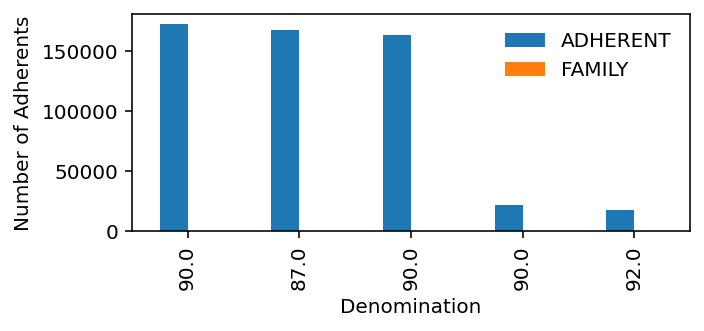

In [27]:
#North Dakota bar graph
def top5_bar(year,STATEAB):
    df_MW_year = usa_df_MW[usa_df_MW.YEAR == year]
    State_year = df_MW_year[df_MW_year.STATEAB == STATEAB]
    State_year_t5 = State_year.nlargest(5, 'ADHERENT')
    bar = State_year_t5[['ADHERENT','FAMILY']].plot(kind='bar', figsize=(5,2))
    bar.set_xticklabels(State_year_t5['FAMILY'])
    bar.legend(loc='upper right', frameon=False)
    plt.xlabel("Denomination")
    plt.ylabel("Number of Adherents")
    print("\n\t\tTop 5 Churches in", STATEAB, year)
    plt.show()
    
top5_bar(2010,'ND')

In [28]:
#Ohio: OH
df_OH = df[df.STATEAB == 'OH']
display(df_OH.head(2))
display(df_OH.tail(2))

,STFIP,STATEAB,YEAR,TOTPOP,GRPCODE,GRPNAME,ADHERENT,CONGREG,RELTRAD,FAMILY,NOTE_MIS,NOTE_COM,NOTE_MEA
12623,39,OH,1980,10797630,323,Old Order Amish Church,26837.0,165.0,1,95.0,0,0,1
12624,39,OH,1980,10797630,449,"The United Methodist Church, old count",741753.0,2236.0,2,92.0,0,0,0


,STFIP,STATEAB,YEAR,TOTPOP,GRPCODE,GRPNAME,ADHERENT,CONGREG,RELTRAD,FAMILY,NOTE_MIS,NOTE_COM,NOTE_MEA
13137,39,OH,2010,11536504,69,Bible Presbyterian Church (General Synod),0.0,1.0,1,91.0,0,0,0
13138,39,OH,2010,11536504,356,Presbyterian Church in America,3105.0,20.0,1,91.0,0,0,0



		Top 5 Churches in OH 2010


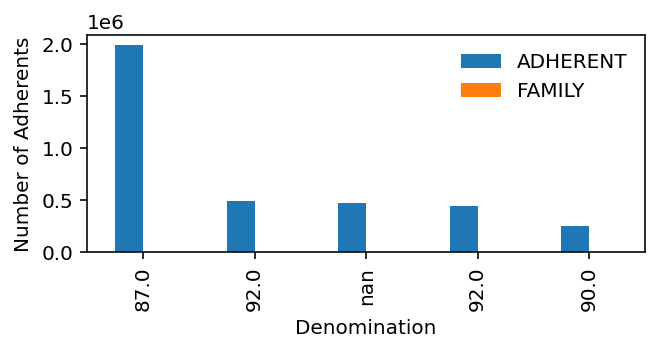

In [29]:
#Ohio bar graph
def top5_bar(year,STATEAB):
    df_MW_year = usa_df_MW[usa_df_MW.YEAR == year]
    State_year = df_MW_year[df_MW_year.STATEAB == STATEAB]
    State_year_t5 = State_year.nlargest(5, 'ADHERENT')
    bar = State_year_t5[['ADHERENT','FAMILY']].plot(kind='bar', figsize=(5,2))
    bar.set_xticklabels(State_year_t5['FAMILY'])
    bar.legend(loc='upper right', frameon=False)
    plt.xlabel("Denomination")
    plt.ylabel("Number of Adherents")
    print("\n\t\tTop 5 Churches in", STATEAB, year)
    plt.show()
    
top5_bar(2010,'OH')

In [30]:
#South Dakota: SD
df_SD = df[df.STATEAB == 'SD']
display(df_SD.head(2))
display(df_SD.tail(2))

,STFIP,STATEAB,YEAR,TOTPOP,GRPCODE,GRPNAME,ADHERENT,CONGREG,RELTRAD,FAMILY,NOTE_MIS,NOTE_COM,NOTE_MEA
14962,46,SD,1980,690768,283,"Lutheran Church, The Missouri Synod",33773.0,113.0,1,90.0,0,0,0
14963,46,SD,1980,690768,413,Seventh-day Adventists,2474.0,25.0,1,98.0,0,0,0


,STFIP,STATEAB,YEAR,TOTPOP,GRPCODE,GRPNAME,ADHERENT,CONGREG,RELTRAD,FAMILY,NOTE_MIS,NOTE_COM,NOTE_MEA
15257,46,SD,2010,814180,257b,Bruderhof and Hutterian Groups Combined,6000.0,60.0,1,101.0,0,2,0
15258,46,SD,2010,814180,314,North American Lutheran Church,3672.0,14.0,1,90.0,1,1,0



		Top 5 Churches in SD 2010


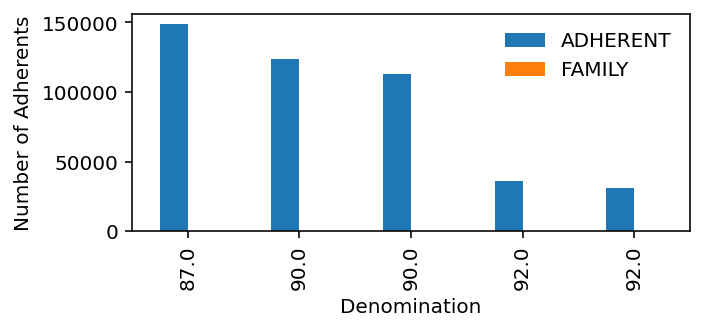

In [31]:
#South Dakota bar graph
def top5_bar(year,STATEAB):
    df_MW_year = usa_df_MW[usa_df_MW.YEAR == year]
    State_year = df_MW_year[df_MW_year.STATEAB == STATEAB]
    State_year_t5 = State_year.nlargest(5, 'ADHERENT')
    bar = State_year_t5[['ADHERENT','FAMILY']].plot(kind='bar', figsize=(5,2))
    bar.set_xticklabels(State_year_t5['FAMILY'])
    bar.legend(loc='upper right', frameon=False)
    plt.xlabel("Denomination")
    plt.ylabel("Number of Adherents")
    print("\n\t\tTop 5 Churches in", STATEAB, year)
    plt.show()
    
top5_bar(2010,'SD')

In [32]:
#Wisconsin: WI
df_WI = df[df.STATEAB == 'WI']
display(df_WI.head(2))
display(df_WI.tail(2))

,STFIP,STATEAB,YEAR,TOTPOP,GRPCODE,GRPNAME,ADHERENT,CONGREG,RELTRAD,FAMILY,NOTE_MIS,NOTE_COM,NOTE_MEA
17361,55,WI,1980,4705767,97,Christian Churches and Churches of Christ,5751.0,35.0,1,115.0,0,0,0
17362,55,WI,1980,4705767,419,Southern Baptist Convention,9466.0,44.0,1,96.0,0,0,3


,STFIP,STATEAB,YEAR,TOTPOP,GRPCODE,GRPNAME,ADHERENT,CONGREG,RELTRAD,FAMILY,NOTE_MIS,NOTE_COM,NOTE_MEA
17756,55,WI,2010,5686986,335,The Orthodox Presbyterian Church,2042.0,14.0,1,91.0,4,0,0
17757,55,WI,2010,5686986,17,American Baptist Association,185.0,2.0,1,96.0,4,0,0



		Top 5 Churches in WI 2010


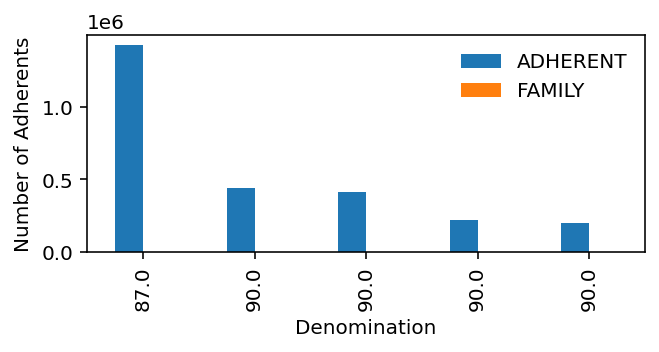

In [33]:
#Wisconsin bar graph
def top5_bar(year,STATEAB):
    df_MW_year = usa_df_MW[usa_df_MW.YEAR == year]
    State_year = df_MW_year[df_MW_year.STATEAB == STATEAB]
    State_year_t5 = State_year.nlargest(5, 'ADHERENT')
    bar = State_year_t5[['ADHERENT','FAMILY']].plot(kind='bar', figsize=(5,2))
    bar.set_xticklabels(State_year_t5['FAMILY'])
    bar.legend(loc='upper right', frameon=False)
    plt.xlabel("Denomination")
    plt.ylabel("Number of Adherents")
    print("\n\t\tTop 5 Churches in", STATEAB, year)
    plt.show()
    
top5_bar(2010,'WI')

In [34]:
#PIE CHARTS FOR ALL STATES IN MIDWEST (1980-2010)
def top5_pie(year,STATEAB):
    df_year = df[df.YEAR == year] #year
    State_year = df_year[df_year.STATEAB == STATEAB]
    State_year_t5 = State_year.nlargest(5, 'ADHERENT')
    pie_labels = State_year_t5['FAMILY']
    pie = State_year_t5[['ADHERENT','FAMILY']].plot.pie(y='ADHERENT',labels = pie_labels,ylabel = '',figsize=(5,10), fontsize=12)
    pie.legend(loc='upper right',fontsize=12)
    print("\nDTop 5 ADHERENTS in",STATEAB,year)
    plt.show()


DTop 5 ADHERENTS in MO 2000


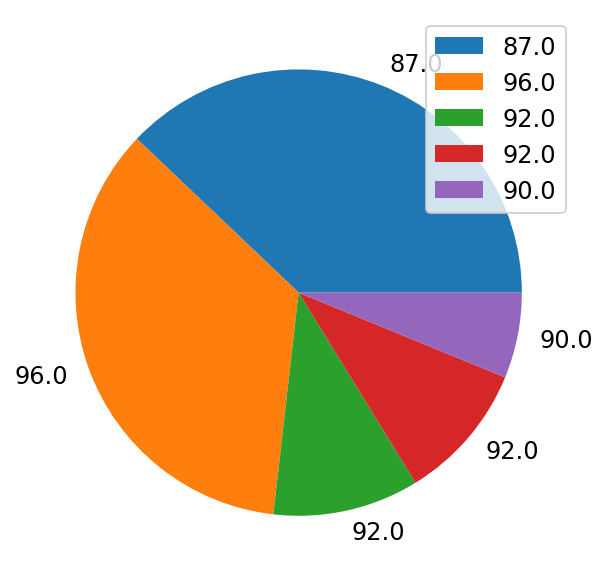


DTop 5 ADHERENTS in MO 2010


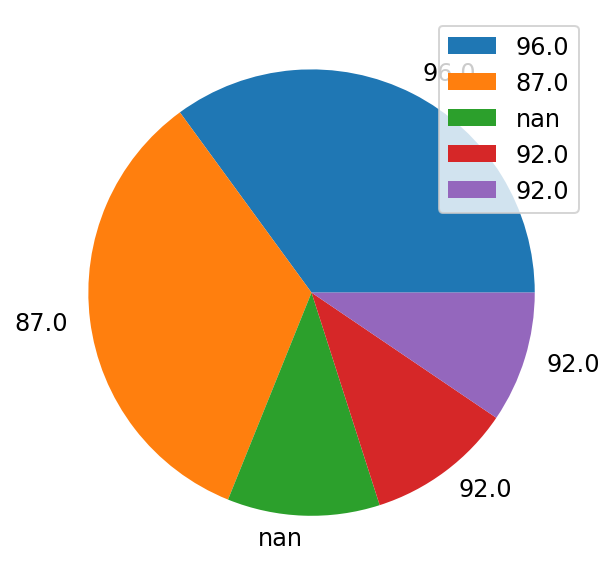


DTop 5 ADHERENTS in MO 1980


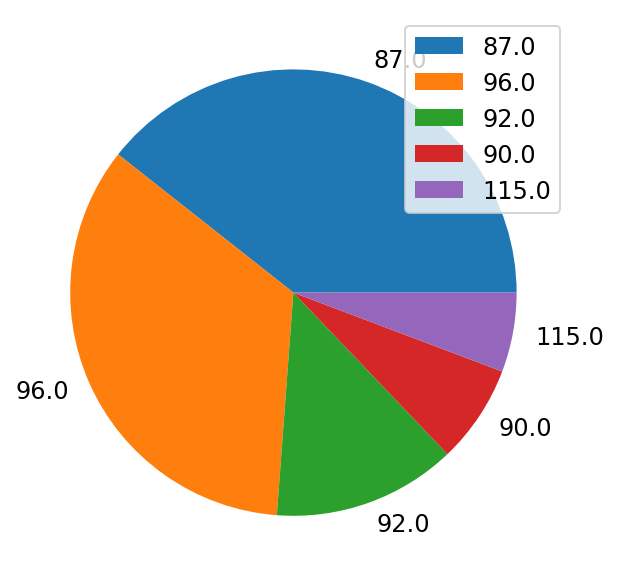


DTop 5 ADHERENTS in MO 1990


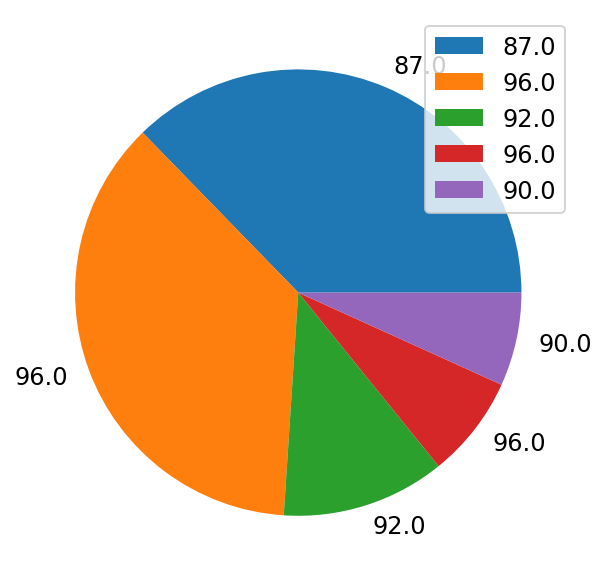


DTop 5 ADHERENTS in IL 2000


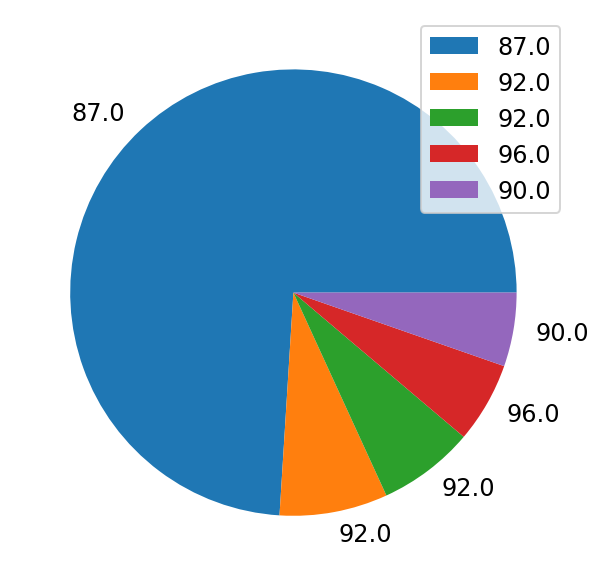


DTop 5 ADHERENTS in IL 2010


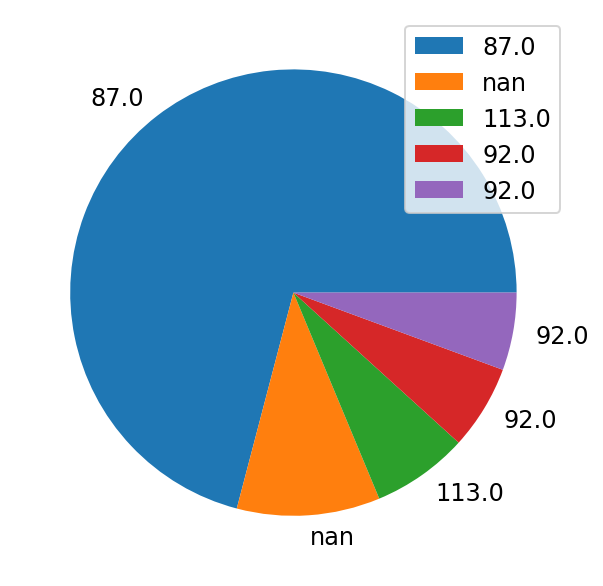


DTop 5 ADHERENTS in IL 1980


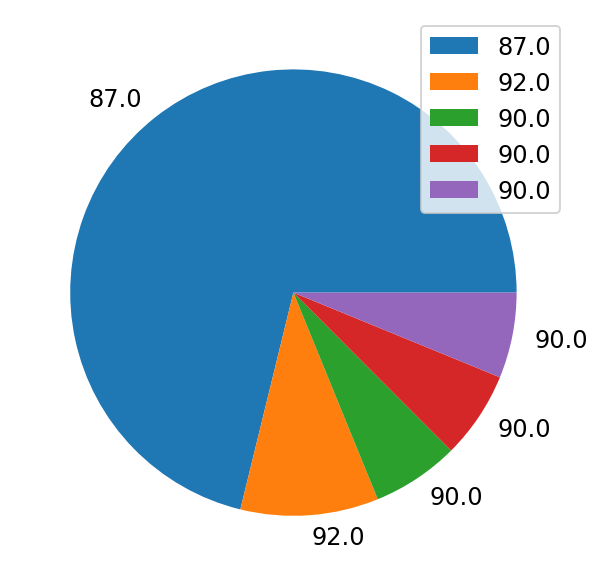


DTop 5 ADHERENTS in IL 1990


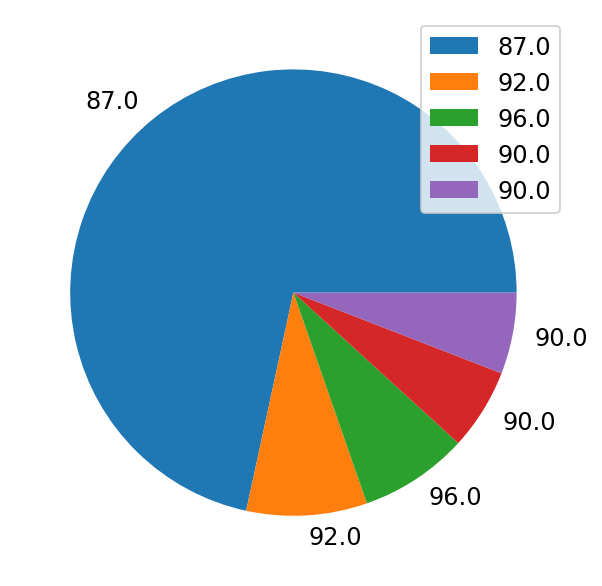


DTop 5 ADHERENTS in IN 2000


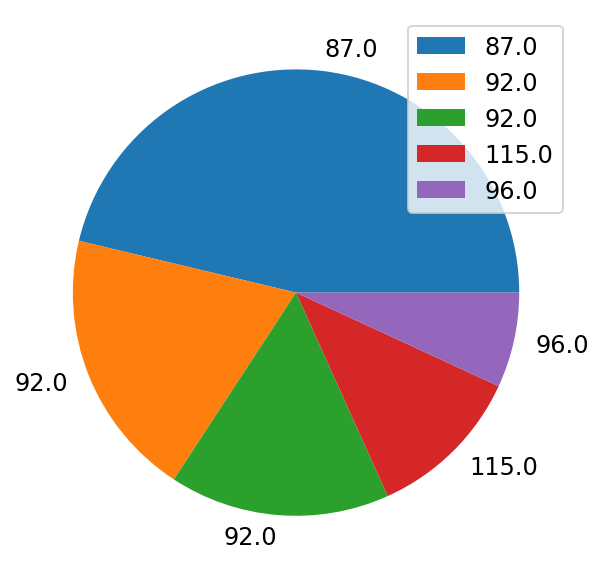


DTop 5 ADHERENTS in IN 2010


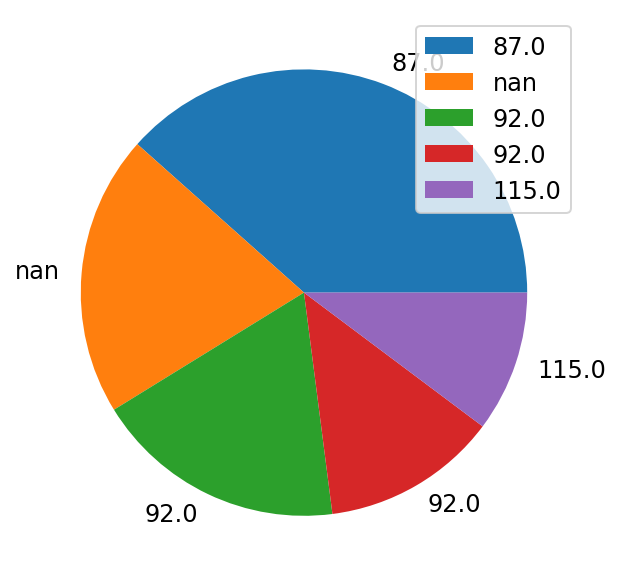


DTop 5 ADHERENTS in IN 1980


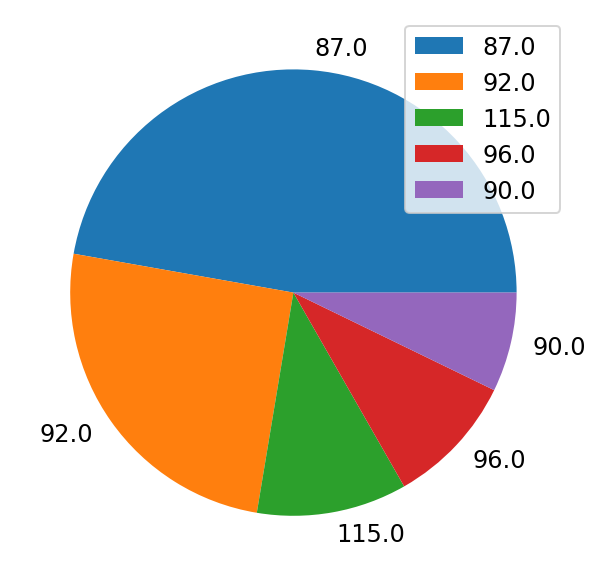


DTop 5 ADHERENTS in IN 1990


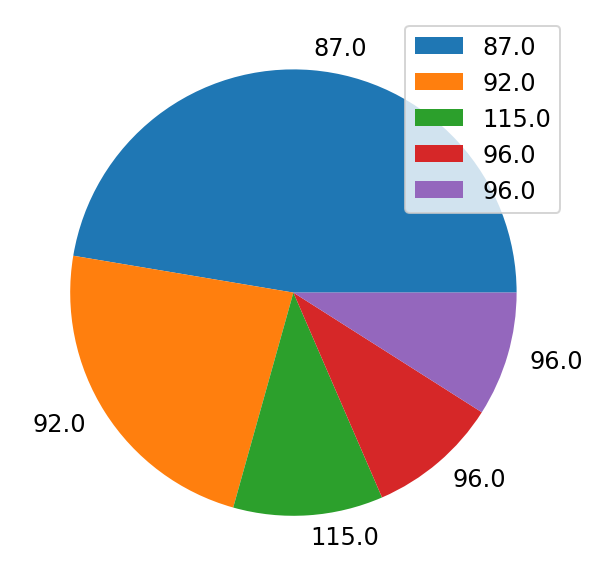


DTop 5 ADHERENTS in KS 2000


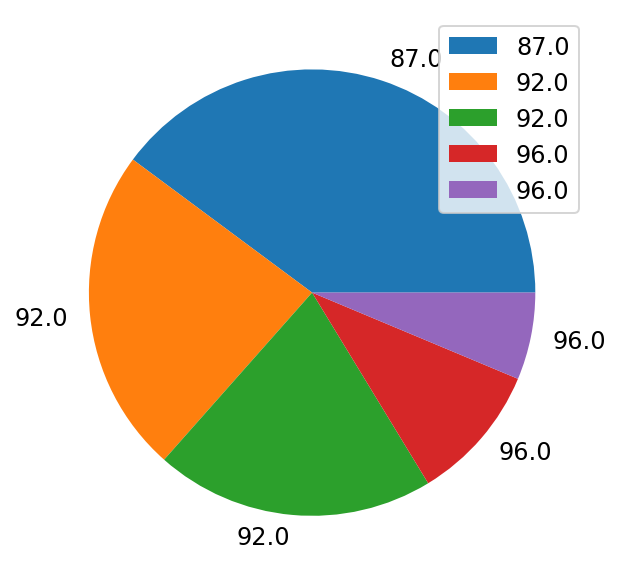


DTop 5 ADHERENTS in KS 2010


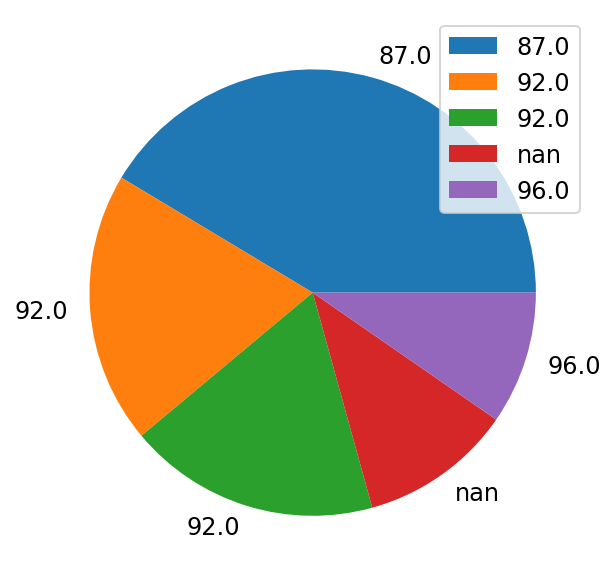


DTop 5 ADHERENTS in KS 1980


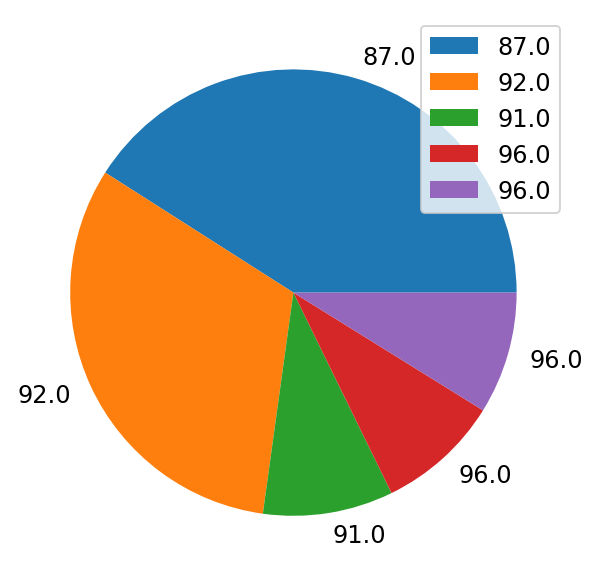


DTop 5 ADHERENTS in KS 1990


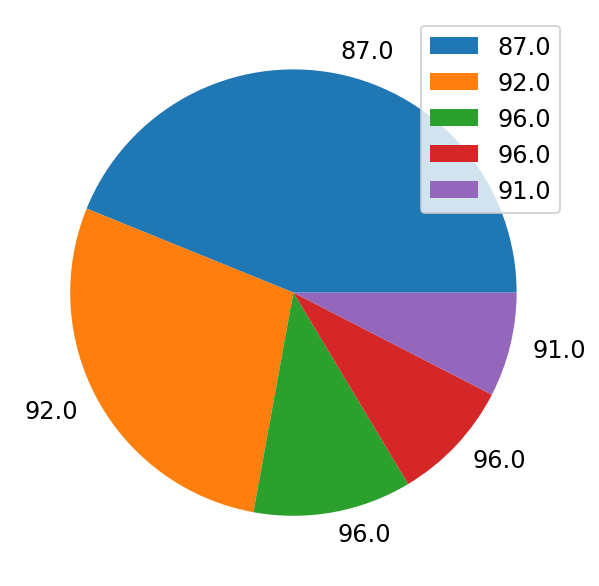


DTop 5 ADHERENTS in MI 2000


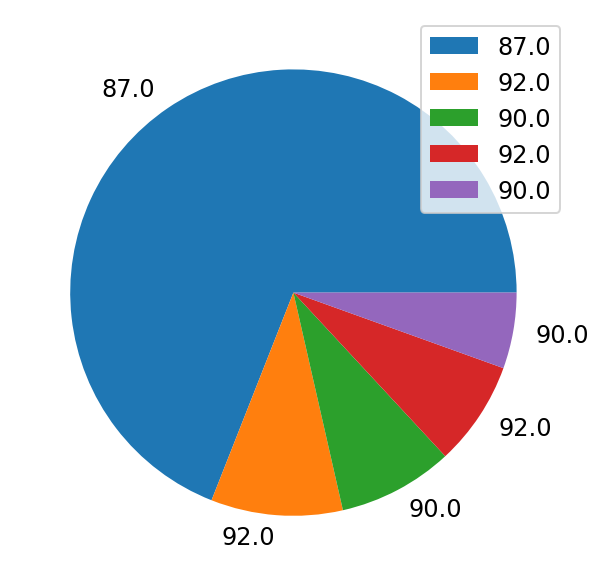


DTop 5 ADHERENTS in MI 2010


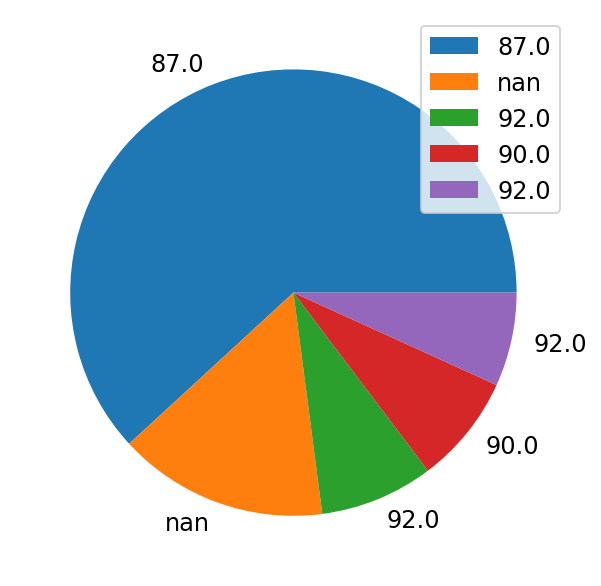


DTop 5 ADHERENTS in MI 1980


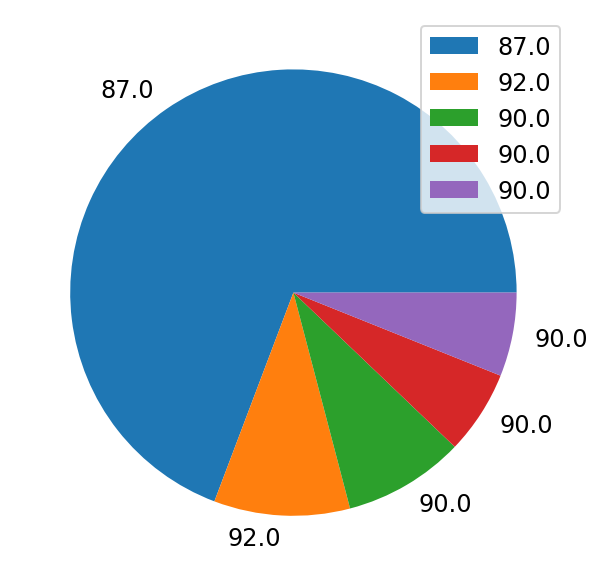


DTop 5 ADHERENTS in MI 1990


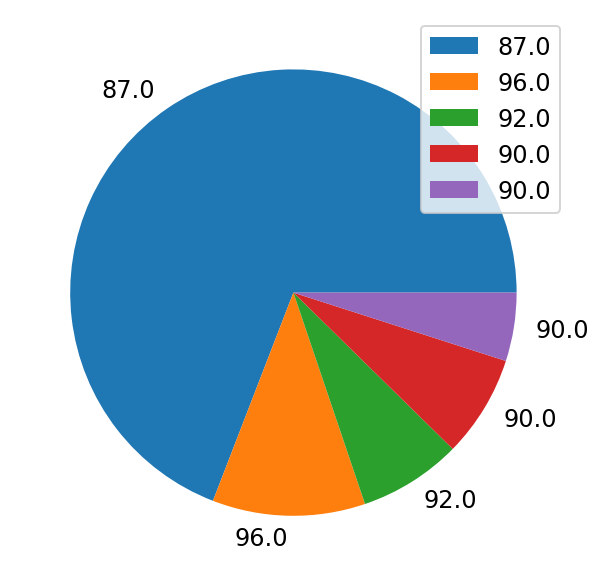


DTop 5 ADHERENTS in WI 2000


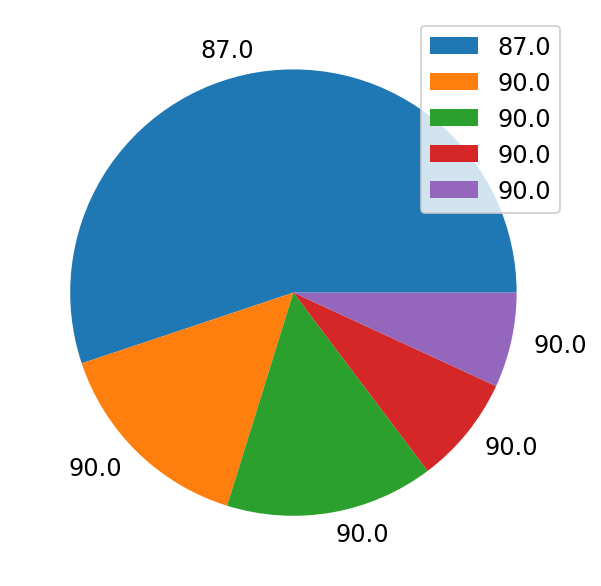


DTop 5 ADHERENTS in WI 2010


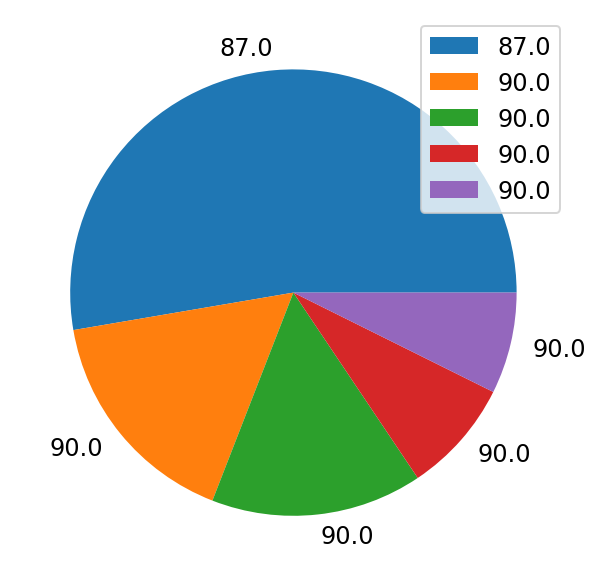


DTop 5 ADHERENTS in WI 1980


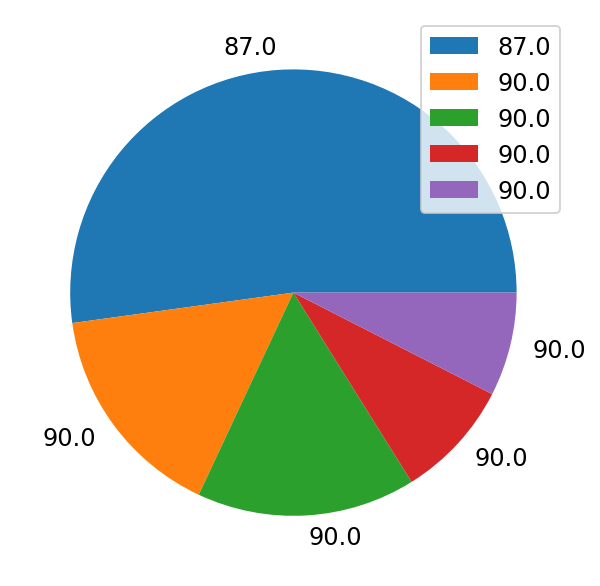


DTop 5 ADHERENTS in WI 1990


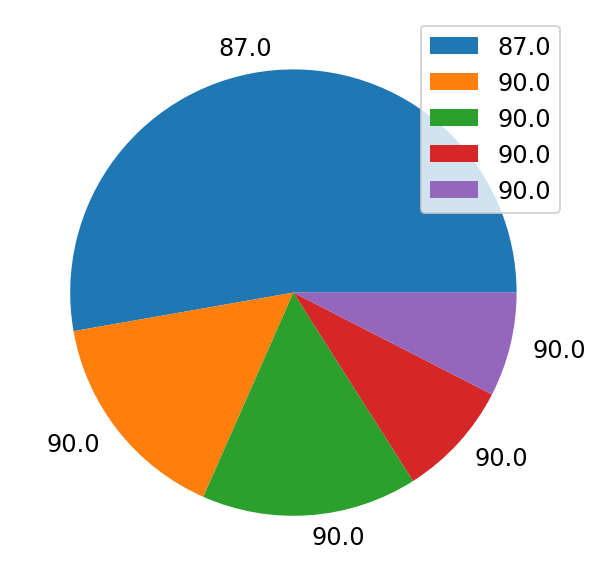


DTop 5 ADHERENTS in OH 2000


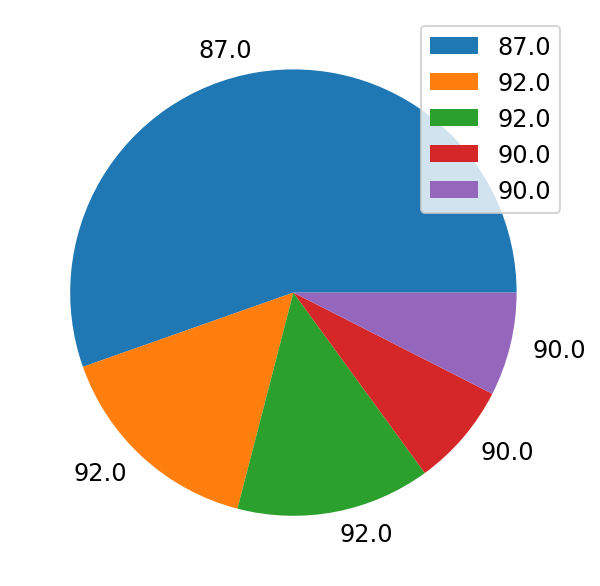


DTop 5 ADHERENTS in OH 2010


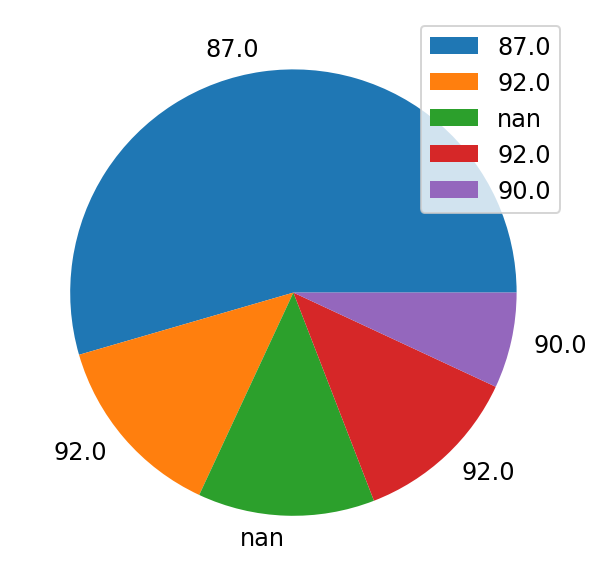


DTop 5 ADHERENTS in OH 1980


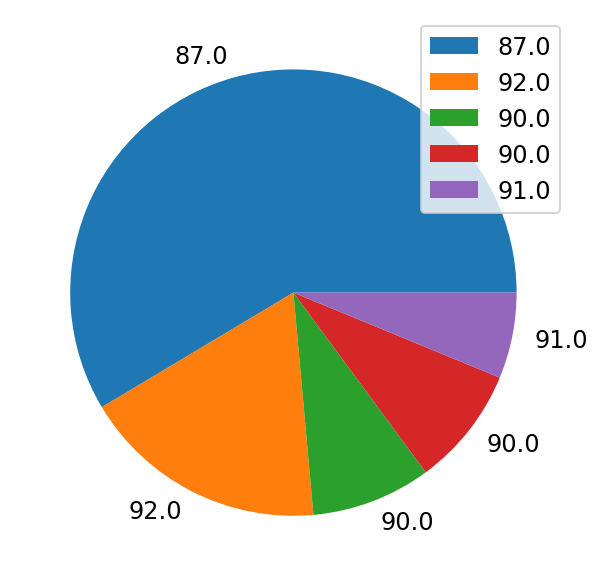


DTop 5 ADHERENTS in OH 1990


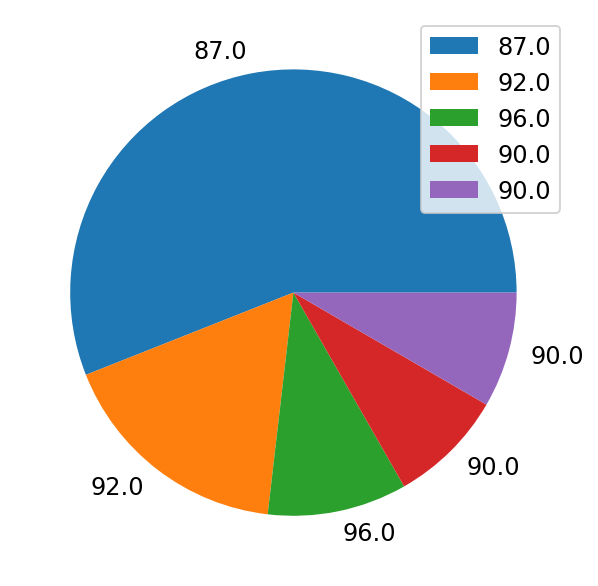


DTop 5 ADHERENTS in ND 2000


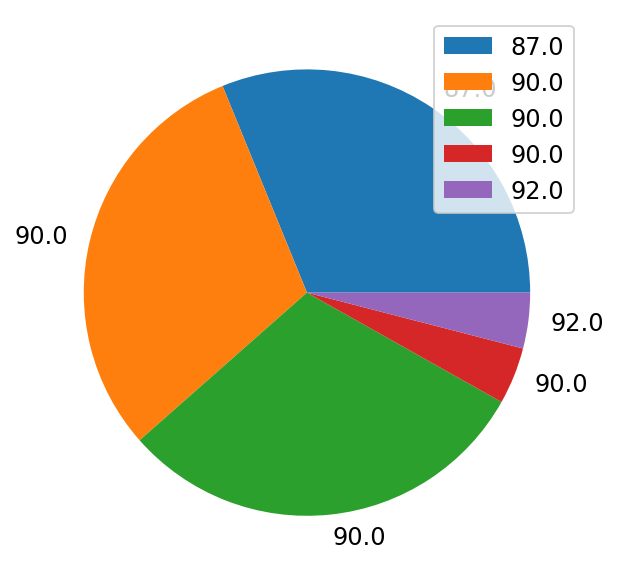


DTop 5 ADHERENTS in ND 2010


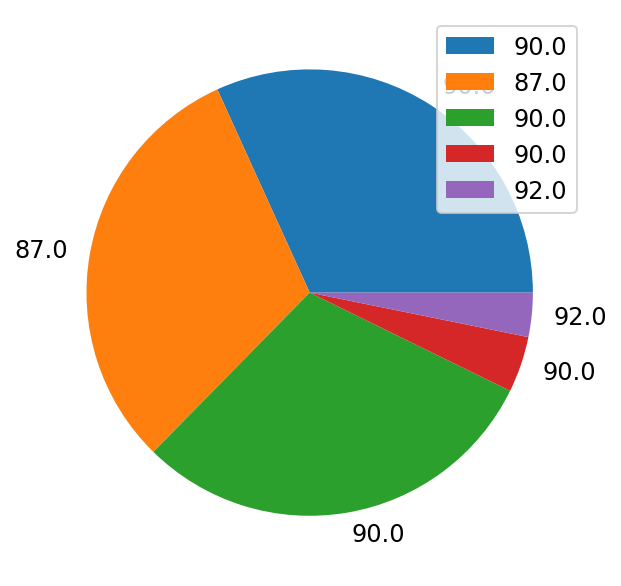


DTop 5 ADHERENTS in ND 1980


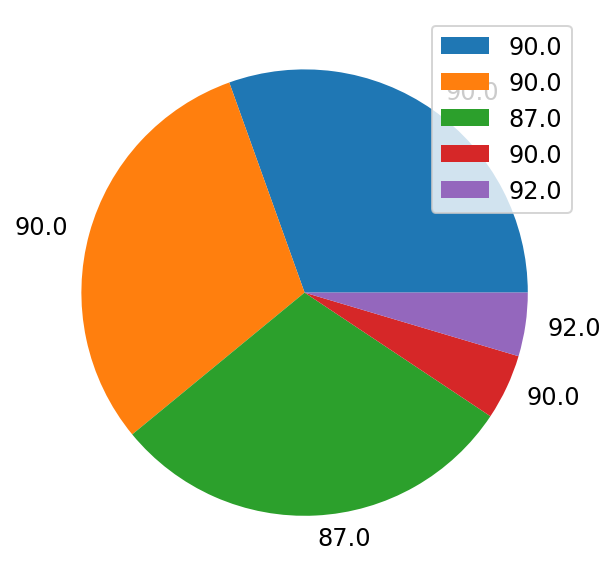


DTop 5 ADHERENTS in ND 1990


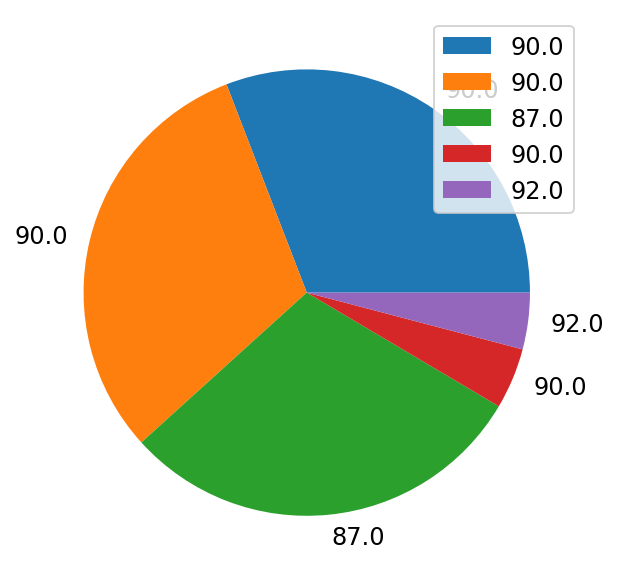


DTop 5 ADHERENTS in SD 2000


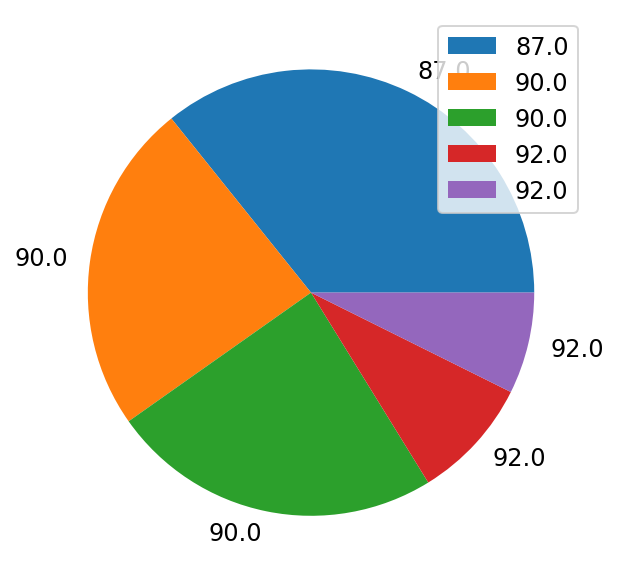


DTop 5 ADHERENTS in SD 2010


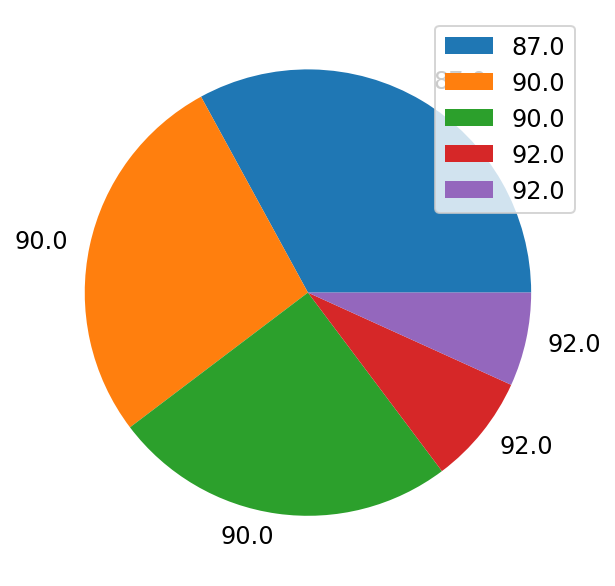


DTop 5 ADHERENTS in SD 1980


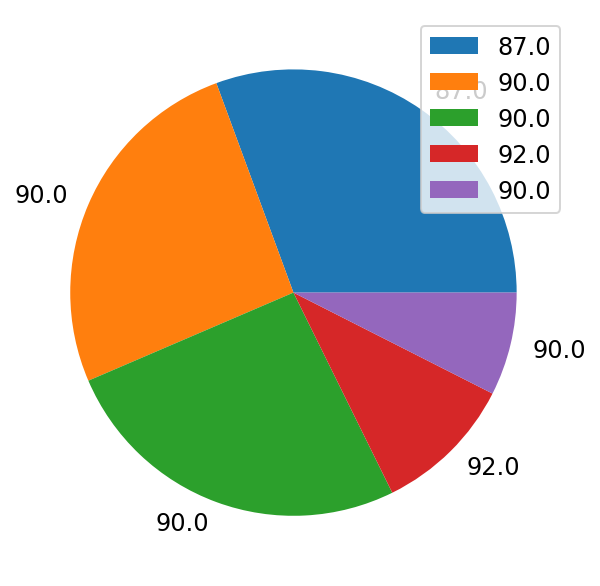


DTop 5 ADHERENTS in SD 1990


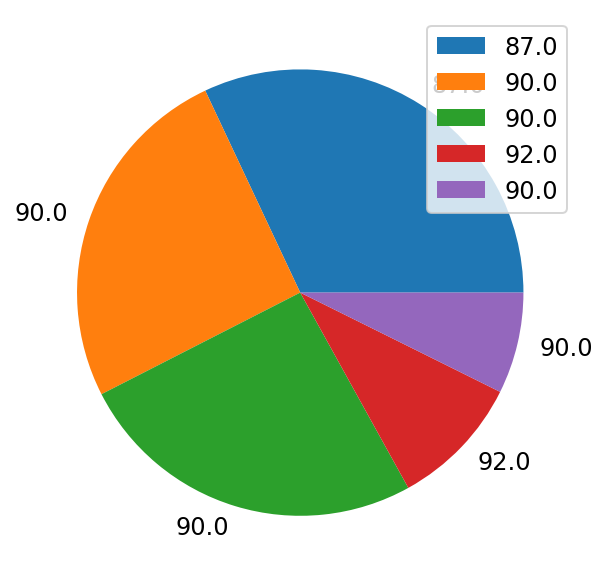


DTop 5 ADHERENTS in IA 2000


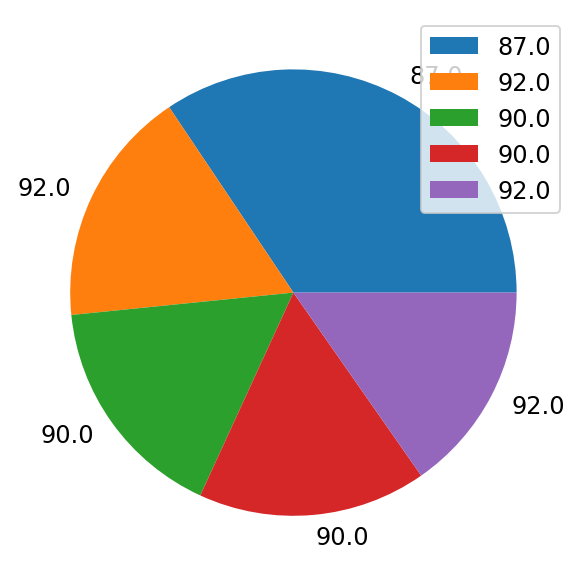


DTop 5 ADHERENTS in IA 2010


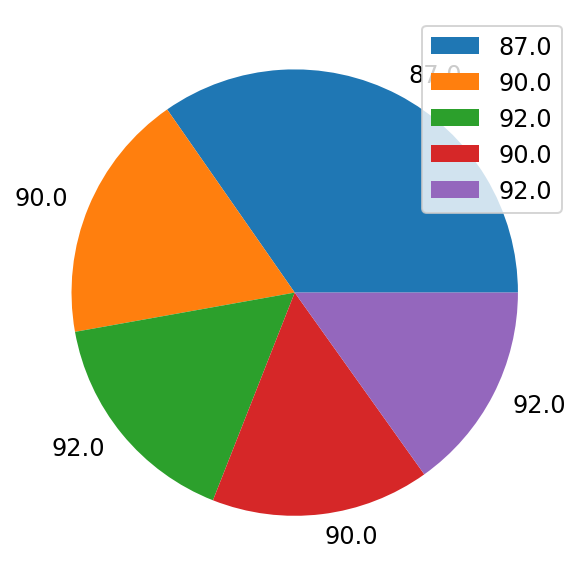


DTop 5 ADHERENTS in IA 1980


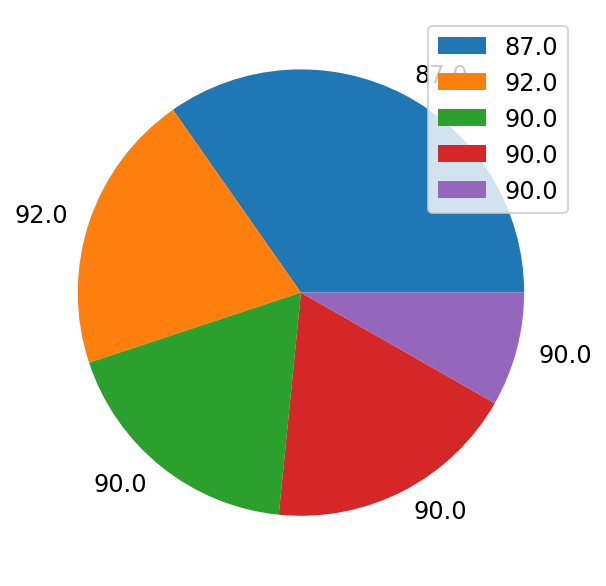


DTop 5 ADHERENTS in IA 1990


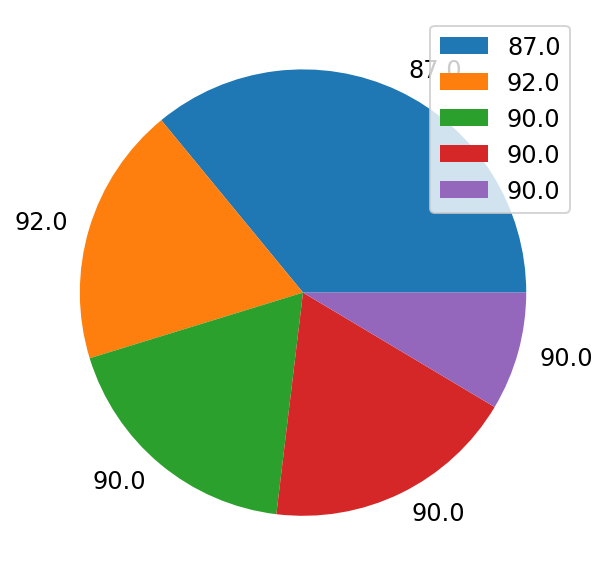


DTop 5 ADHERENTS in NE 2000


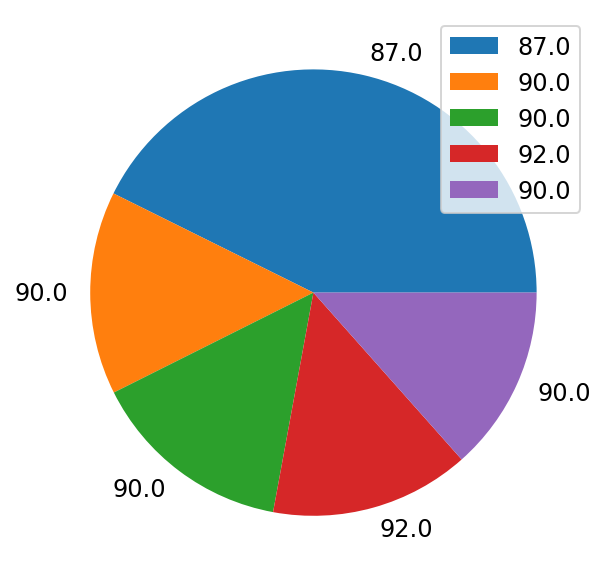


DTop 5 ADHERENTS in NE 2010


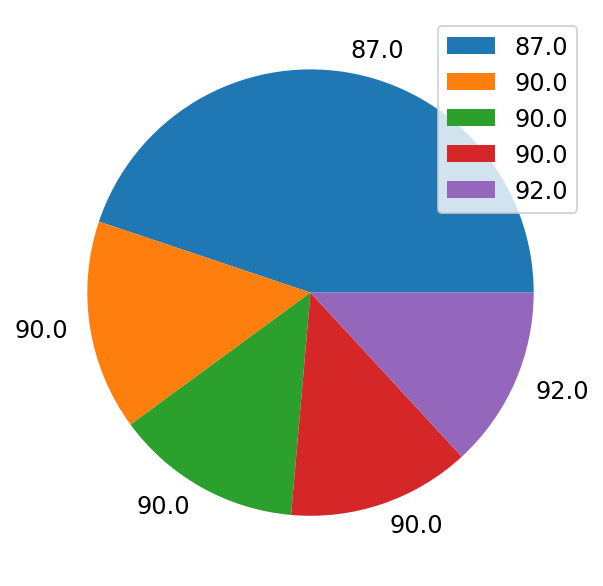


DTop 5 ADHERENTS in NE 1980


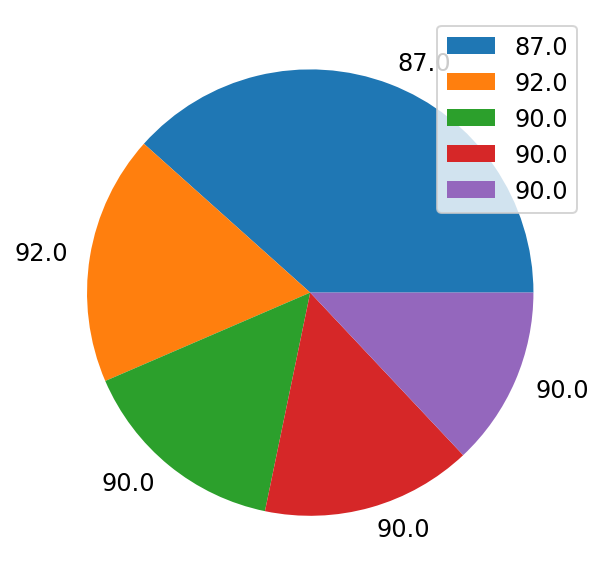


DTop 5 ADHERENTS in NE 1990


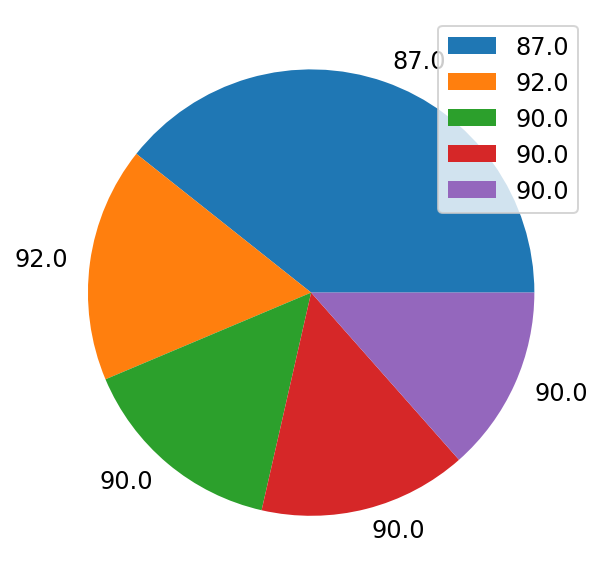


DTop 5 ADHERENTS in MN 2000


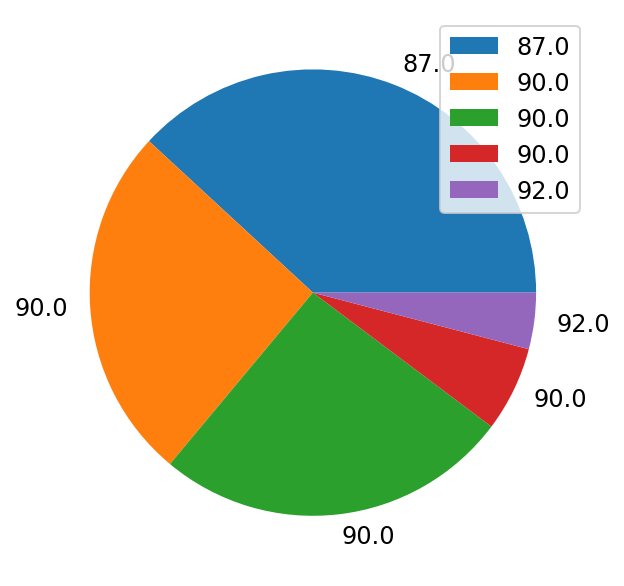


DTop 5 ADHERENTS in MN 2010


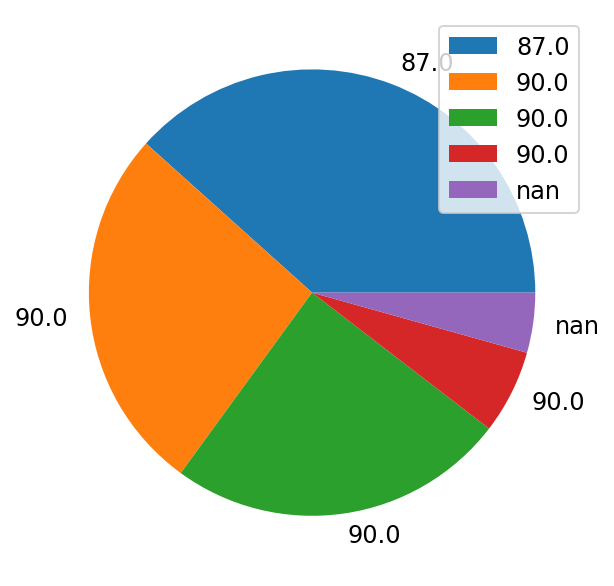


DTop 5 ADHERENTS in MN 1980


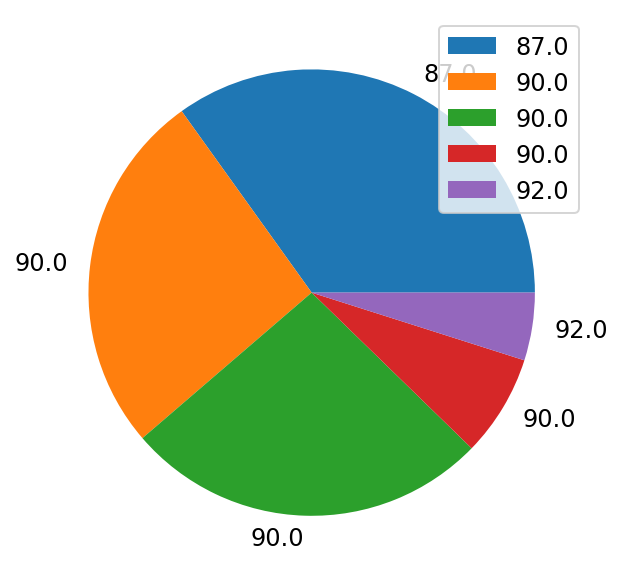


DTop 5 ADHERENTS in MN 1990


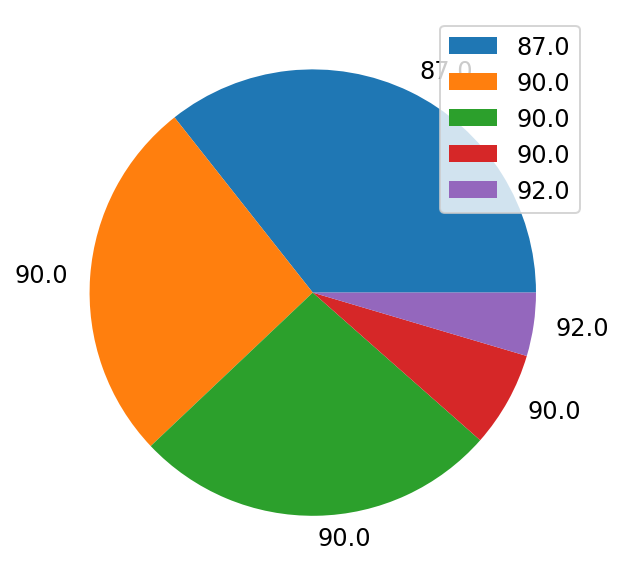

In [35]:
for state_i in list(set(df_MW['STATEAB'])):
    for year_i in list(set(df_MW['YEAR'])):
        top5_pie(year_i,state_i)